<a href="https://colab.research.google.com/github/dars180602/Credit-Card-Fraud-Detection/blob/Dev/Credit_Card_Fraud_Detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Credit Card Fraud Detection**


Our project, centered on the development of an advanced Credit Card Fraud Detection Model is a Capstone Project developed by Cecille Jatulan, Maria Melencio, Michael Montanez, David Higuera, and Diana Reyes, students of the Big Data Analytics program at Lambton College.


**Data Source:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

Note: The data was downloaded from the data source and then uploaded to Google Drive

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

* Features V1, V2, ... V28 are the principal components obtained with PCA;

* The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

* The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

* Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.


**Timeline and Deliverables:** https://docs.google.com/spreadsheets/d/1JDPSTqTU8q4MK3zN5AF9vBCsO8XDJI5lD9oyeVHPxPM/edit#gid=1115838130


**Github Repository:** https://github.com/dars180602/Credit-Card-Fraud-Detection


**Google Colab Link:** https://colab.research.google.com/drive/1D-RRUslLfotFEVqwImfes5CWee3Yot3I?usp=sharing#scrollTo=7RHcIuyRaA8B

# **Data cleaning and standardization**

***1. Data Preparation (ETL)***


In our project, we initiate this process by acquiring and incorporating essential libraries to streamline data manipulation and examination. Subsequently, we establish connectivity between Google Drive and the Colab environment, enabling seamless access to and utilization of requisite files. Following this, we extract the data from its compressed format and load it into the system's memory. To facilitate comprehensive data scrutiny, we transform the imported data into a pandas dataframe, a versatile data structure that facilitates effortless data manipulation and interpretation. Through this meticulous data preparation regimen, we ensure that our dataset is meticulously organized, devoid of inconsistencies, and primed for in-depth analysis, laying the groundwork for meaningful discoveries and actionable insights.

***2. Data Pre-processing***

Data preprocessing stands as a pivotal phase within the data analysis workflow, encompassing the conversion of unrefined data into a refined, organized structure conducive to analysis. It holds significant importance in upholding the data's quality, coherence, and usability, thereby directly impacting the precision and dependability of the resultant insights.

In this project, adherence to the data preprocessing steps is imperative to guarantee the accuracy, coherence, and appropriateness of the data for subsequent analysis.

1. Check for missing values

2.  Check data unbalance with respect with target value, i.e. Class. Not Fraud=0; Fraud=1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file containing the data
df = pd.read_csv('creditcard.csv')
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Filter rows where 'Class' column equals 1
class_1_data = df[df['Class'] == 1]

# Display the filtered data
print(class_1_data)


            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [4]:
class_1_data.to_csv('test_file.csv', index=False)

In [5]:
# Identify data types of the features

df_types = df.dtypes
print("Data Types of Features:")
print(df_types)

Data Types of Features:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [6]:
# Filter the DataFrame to include only rows with missing values
missing_values_records = df[df.isnull().any(axis=1)]

print("Records with Missing Values:")
print(missing_values_records)

Records with Missing Values:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


In [7]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
df = df.dropna(subset=['Class'])

In [9]:
# Count Unique Values of the "Class" Feature
class_counts = df['Class'].value_counts()

# Display the counts
print("Unique Values and Counts of the 'Class' Feature:")
print(class_counts)

Unique Values and Counts of the 'Class' Feature:
Class
0    284315
1       492
Name: count, dtype: int64


# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a pivotal phase within the data analysis workflow, involving an in-depth examination and synthesis of key attributes, patterns, and correlations inherent within a dataset. Its primary objective is to grasp a comprehensive understanding of the dataset, unveiling prevalent patterns, discerning anomalies, and extracting initial insights before delving into more sophisticated analytical methodologies. EDA commonly entails the utilization of visualizations, summary statistics, and data manipulation techniques to scrutinize and decipher the data's underlying structure, distribution, and pertinent variables. It establishes a crucial groundwork for informed decision-making regarding data preprocessing, model formulation, and subsequent analysis endeavors.

For our Exploratory Data Analysis (EDA), we will undertake the following steps:


1. Obtain summary statistics for the DataFrame

2. Identify the distribution of each column of the dataset

3. Create a histogram to explore the amount distribution, revealing how many transactions have 0 as the amount.

4. Create a histogram to explore the amount distribution, revealing how many transactions have 0 as the amount.

5. Create a histogram to explore the relation between amount and fraudulent transaccions.

6. Create boxplots for all features

7. Create a pie chart to identify the proportion of fraudulent transactions

8. Create a histogram to explore the quantity of transactions along time.

9. Create a boxplot to identify Outliers of amount feature.

In [10]:
# Generating descriptive statistics of the DataFrame by calculating various statistical measures for each numerical column.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


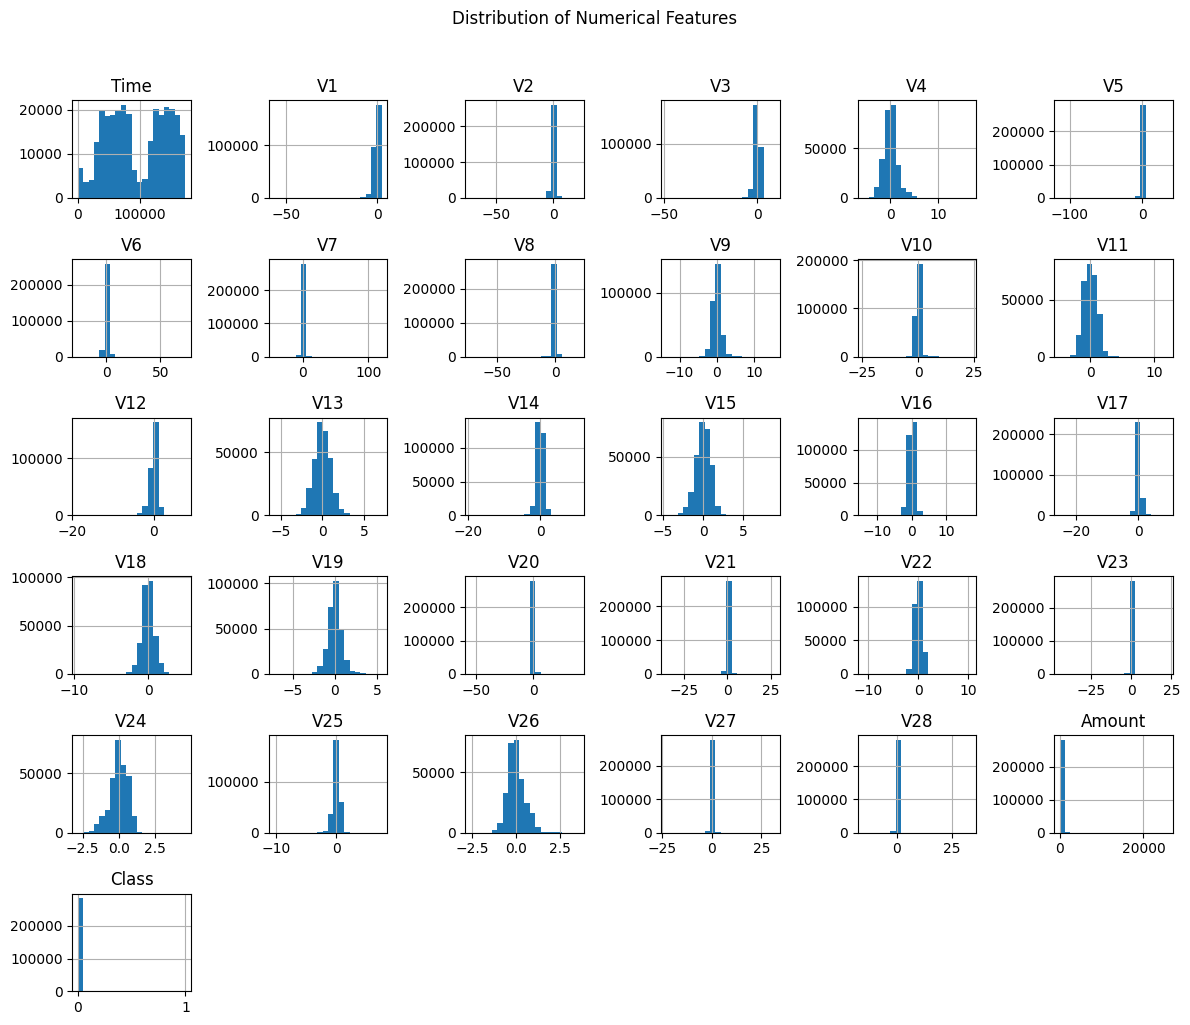

In [11]:
# Identify the distribution of each column of the dataset

df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

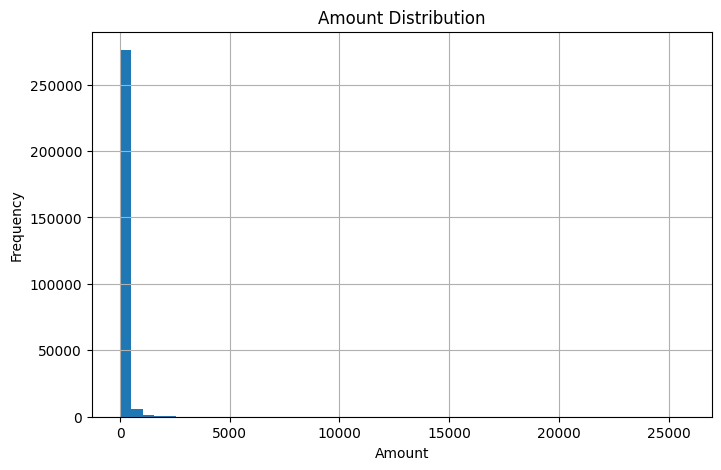

In [12]:
df["Amount"].hist(figsize=(8, 5), bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution')
#plt.tight_layout()
plt.show()

In [13]:
# Print records where 'Amount' column is equal to 0
zero_amount_records = df[df['Amount'] == 0]
display(zero_amount_records)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


In [14]:
df_1 = df[df['Amount'] < 1500]

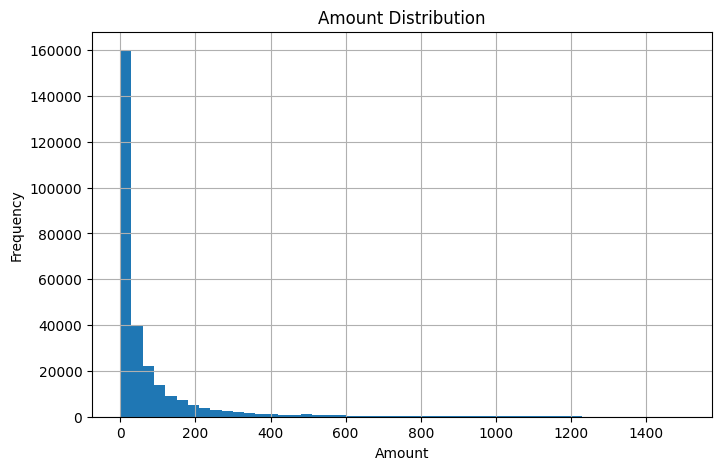

In [15]:
df_1["Amount"].hist(figsize=(8, 5), bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution')
#plt.tight_layout()
plt.show()

In [16]:
df_2 = df[df['Class'] == 1]
display(df_2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


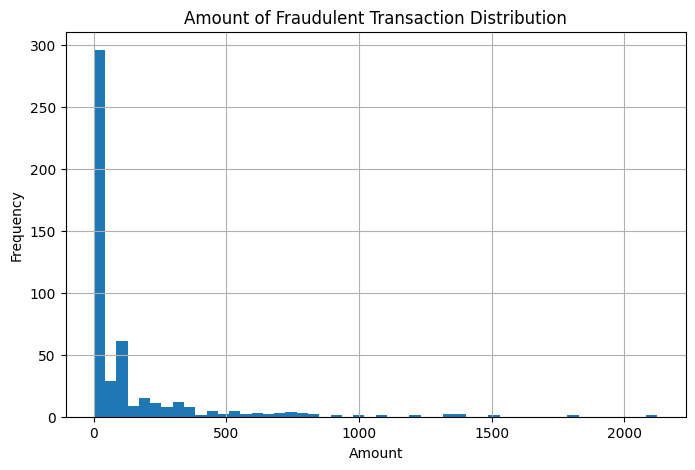

In [17]:
# Relation between Amount and fraudulent transactions

df_2["Amount"].hist(figsize=(8, 5), bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount of Fraudulent Transaction Distribution')
#plt.tight_layout()
plt.show()

The fraudulent transactions present a similar distribution to the rest of transactions. But they seem to keep their amounts relatively small.

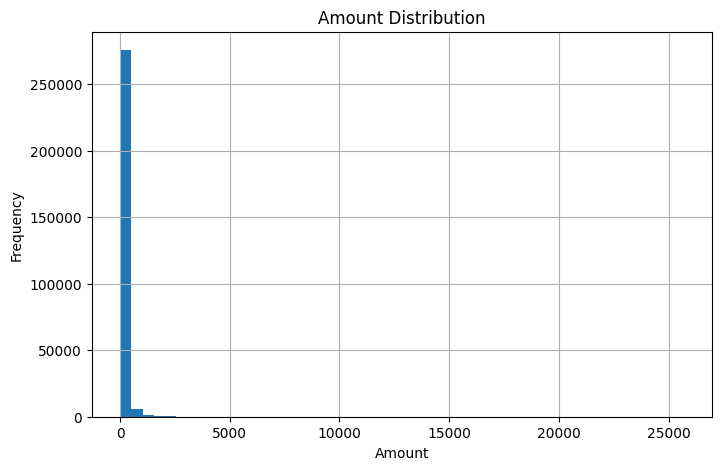

In [18]:
df_3 = df[df['Class'] == 0]
df_3["Amount"].hist(figsize=(8, 5), bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution')
#plt.tight_layout()
plt.show()

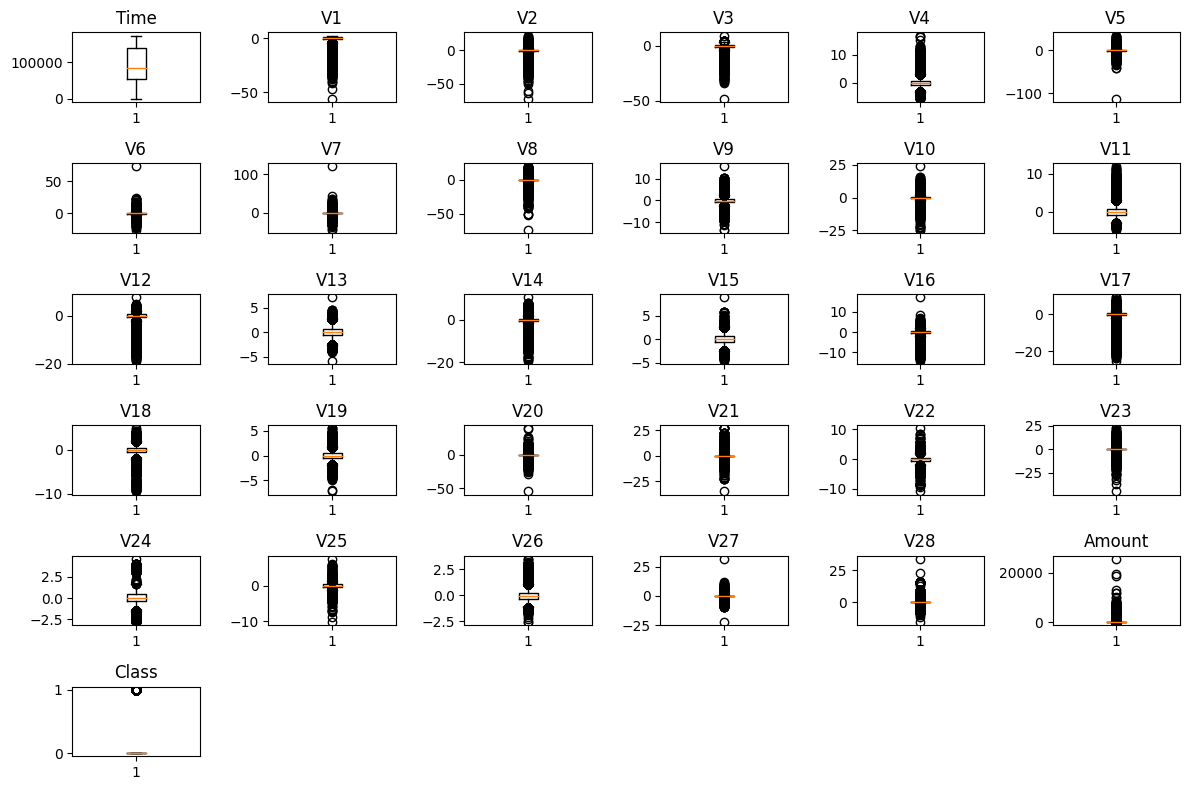

In [19]:
# Create boxplots for all features
plt.figure(figsize=(12, 8))  # Set the figure size

# Loop through each column in the DataFrame
for i, col in enumerate(df.columns):
    plt.subplot(6, 6, i + 1)  # Create subplots
    plt.boxplot(df[col])  # Create boxplot for the current feature
    plt.title(col)  # Set the title as the column name

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()  # Show the plot

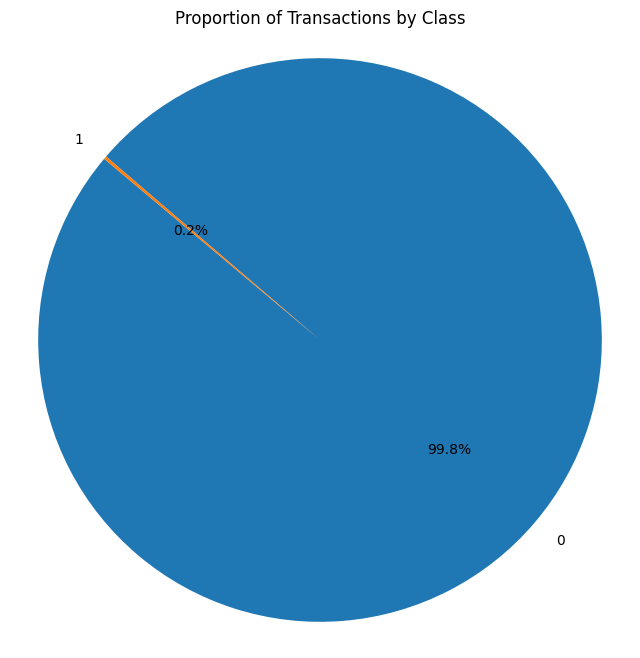

Class
0    284315
1       492
Name: count, dtype: int64


In [20]:
# What is the proportion of fraudulent transactions?


class_counts = df['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Transactions by Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()
print(class_counts)

Only 0.2% of the data corresponds to fraudulent transactions, indicating that thi is a highly imbalanced dataset. The observed behaviour is close to the reality, considering that the majority of the real transactions are not fraudulent.

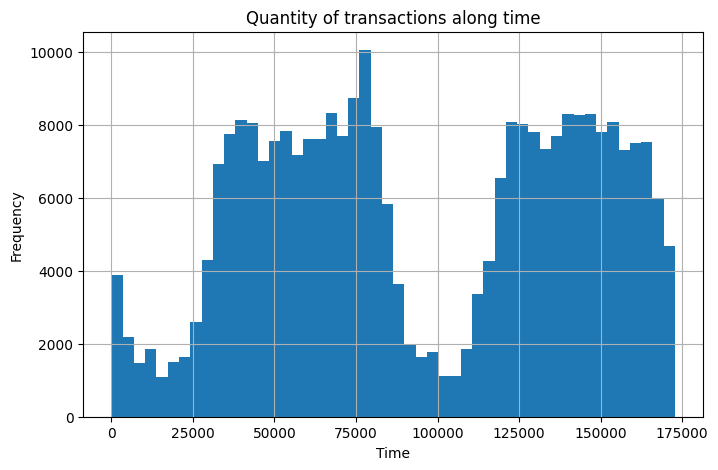

In [21]:
df["Time"].hist(figsize=(8, 5), bins=50)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Quantity of transactions along time')
#plt.tight_layout()
plt.show()

The previous graph presents the behaviour of transactions over time. It indicates that very few transactions are exectued during morning hours (0-30000 secs = 0-8 am).

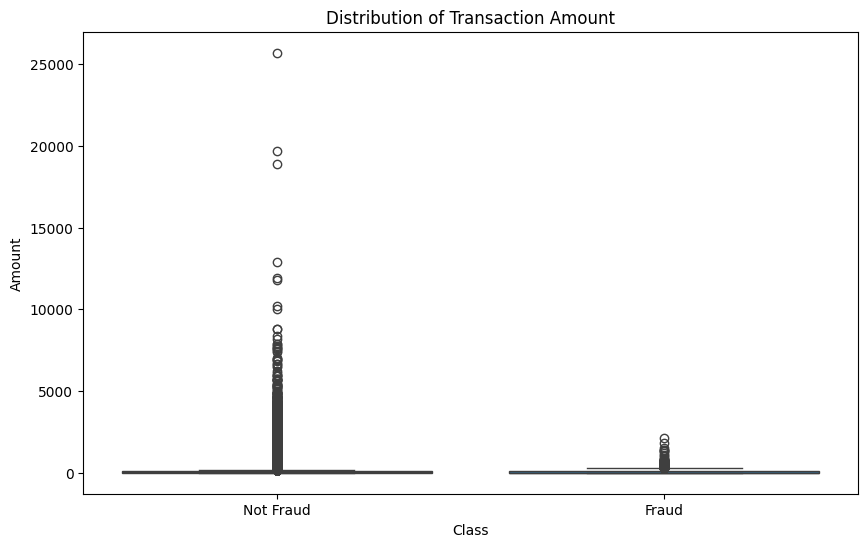

In [22]:


# Visualización de la distribución de la variable "Amount"
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()


The fraudulent transactions in our dataset are part of the outliers, because they are different from regular transactions. By removing the outliers we remove those fraudulent transactions, even if we set far limits to define the outliers.

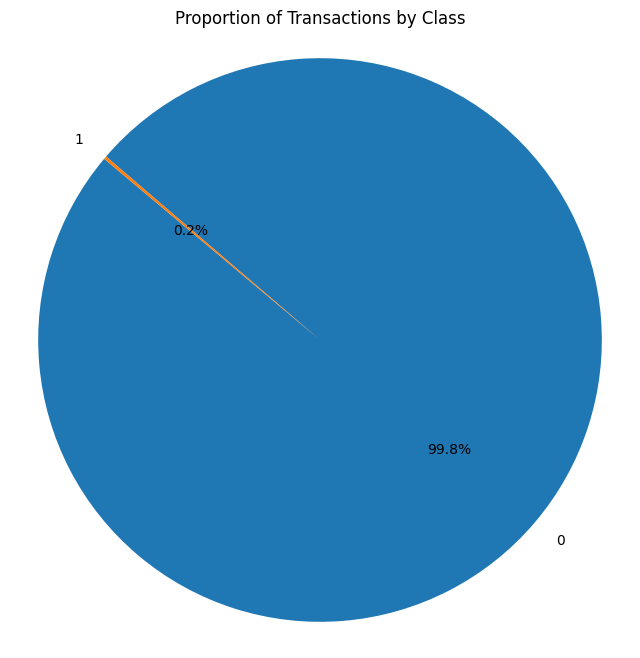

Class
0    284315
1       492
Name: count, dtype: int64


In [23]:
# What is the proportion of fraudulent transactions?


class_counts = df['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Transactions by Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()
print(class_counts)

**HANDLING OUTLIERS AND SOME THOUGHTS**

Considering the characteristics of the dataset and the particularities of the problem we want to solve, there are some things to consider to handle outliers. Due to the imbalanced nature of the dataset, traditional outlier removal techniques may not be the best approach, as the minority class (fraudulent transactions) is what we want to detect. If we base the outlier removal process on the majority class, we could remove valuable information related to fraudulent transactions.

Fraudulent transactions are rare events, this can lead to think that the outliers in the dataset may represent instances of fraud.

For these reasons, the selected first approach will be the execution of robust models and techniques capable to handle imbalanced data and outliers, such as Random Forest or Gradient Boosting. Additionally, anomaly detection algorithms such as Isolation Forest or One-Class SVMs can be used to effectively identify outliers without requiring a balanced dataset.

Additionally, during the evaluation stage, we consider using evaluation metrics that are suitable for imbalanced datasets, such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC). These metrics provide a more comprehensive assessment of the model's ability to detect fraudulent transactions while accounting for the class imbalance.

**FEATURE ENGINEERING:**

*   Modify the Time feature to properly represent the time of the day (indicating the time of the day in which every transaction was executed).

*   Scale the features to avoid imbalanced weights among the independent variables. (First, check model performance without scaling)

In [24]:
# Convert seconds to hours
df['Time'] = df['Time'] / 3600  # 3600 seconds = 1 hour

# Take modulo of 24 to convert to 24-hour format
df['Time'] = df['Time'] % 24

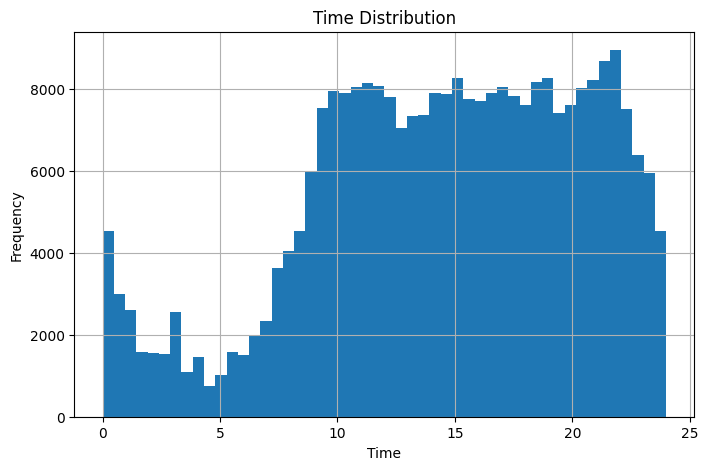

In [25]:
df["Time"].hist(figsize=(8, 5), bins=50)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time Distribution')
#plt.tight_layout()
plt.show()

Splitting the data

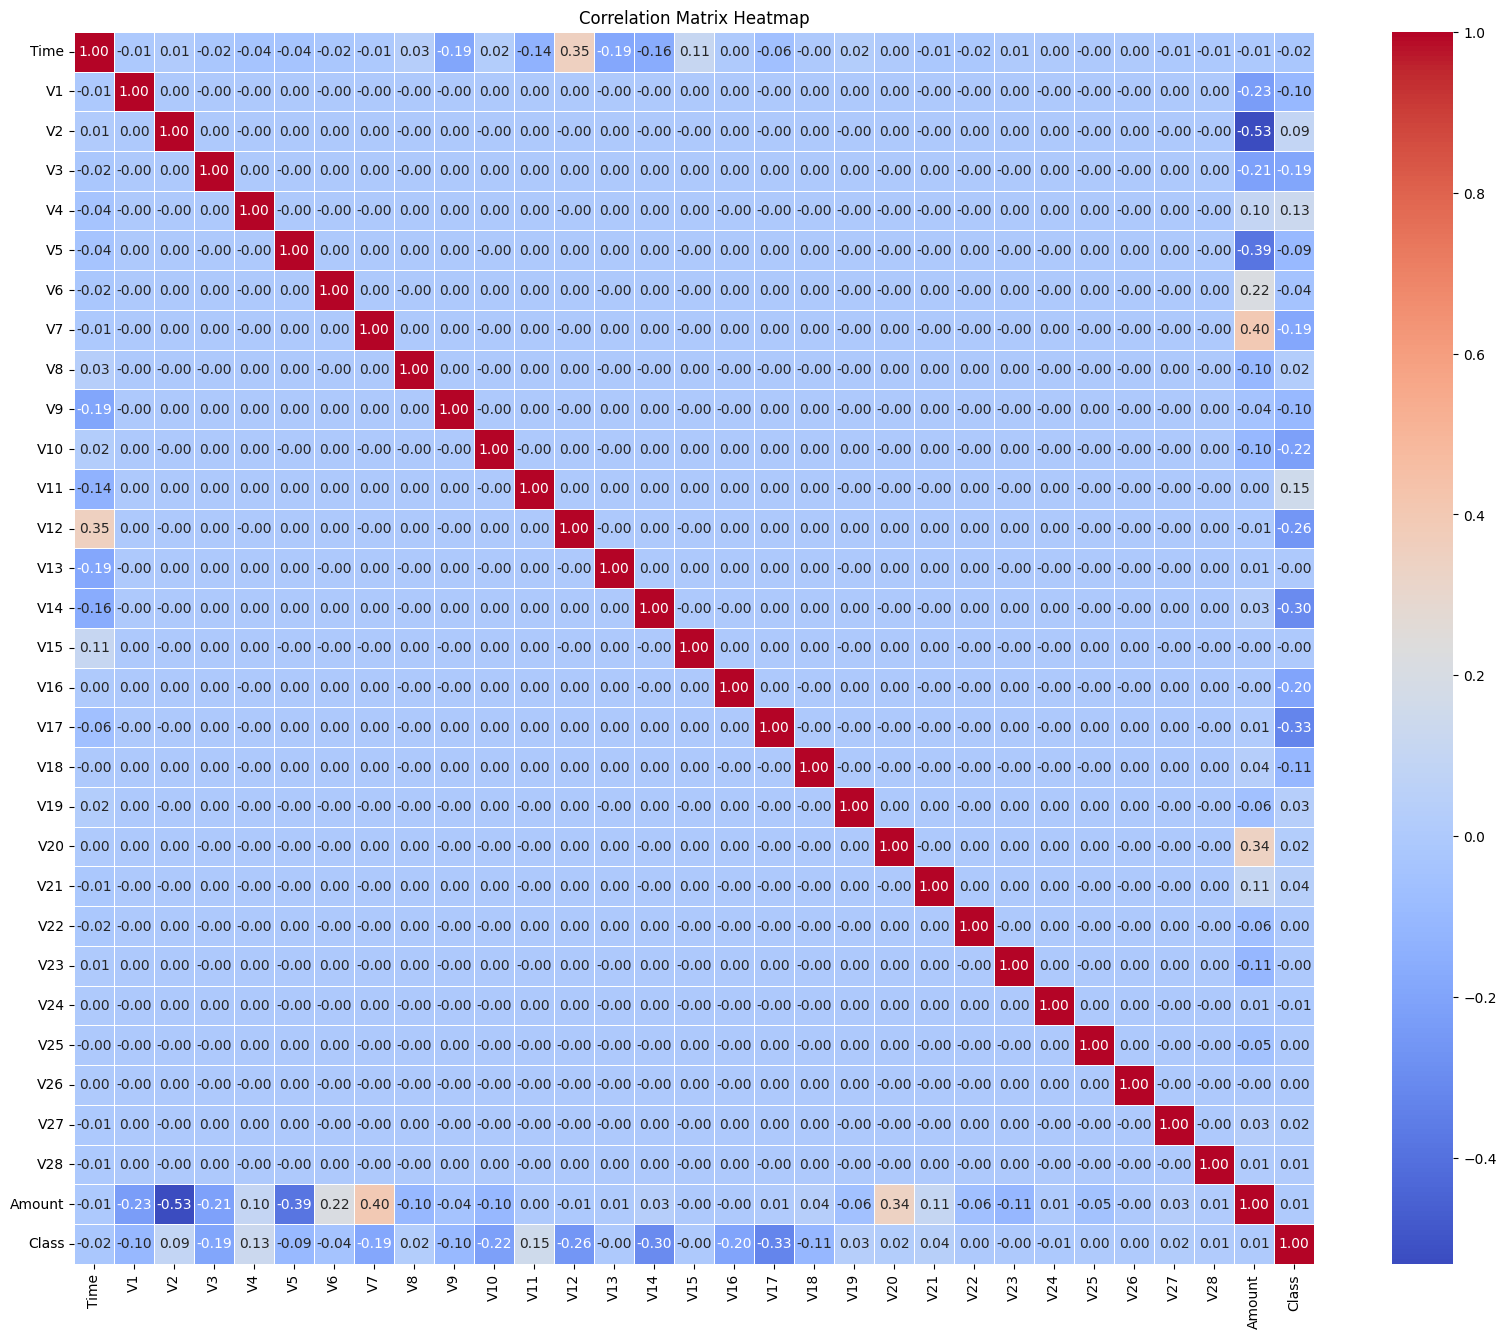

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the features
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [27]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
#X = df.drop(columns=['Class'])  # Features
#X = df.drop(columns=['Class','V1','V2','V5','V6','V8','V9','V11','V13','V15','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time','Amount'])  # Features
X = df.drop(columns=['Class','V1','V2','V5','V6','V8','V9','V11','V13','V15','V22','V23','V25','V26'])  # Features

y = df['Class']  # Target variable

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)


Model development

1 Model: Random Forest Classifier

In [29]:
# Model Selection and Training

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



Considering our context talking about credit card fraud detection, our goal is to increase as high as possible (1 if possible) the recall, because our false negatives refer to all the frauds our model didn't label it as fraud and that is the critical thing on this project

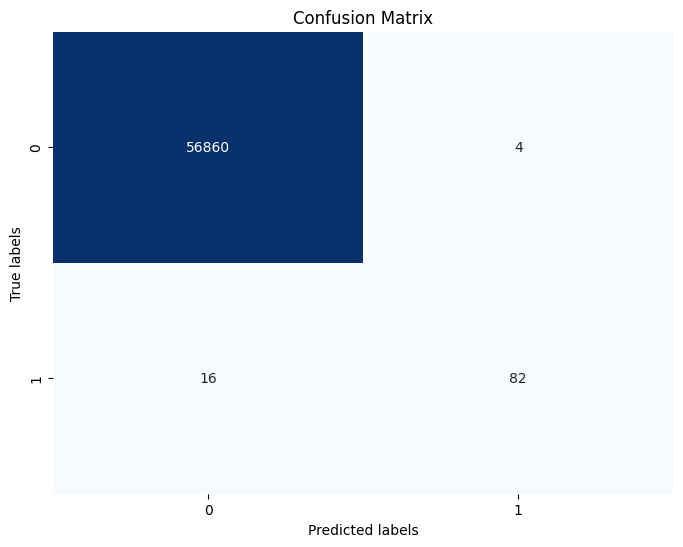

In [31]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
import pickle
# Save the model to a file
with open('modelRF.pickle', 'wb') as f:
    pickle.dump(model, f)


2 Model: XGB classifier

In [34]:
import xgboost as xgb
# Second model
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y) - y.sum()) / y.sum(), random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_1 = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



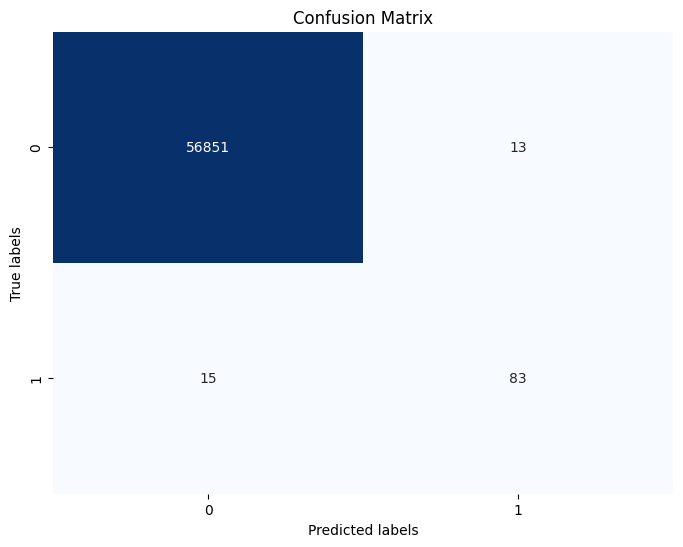

In [35]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

3 Model: Random Forest Classifier after RandomUnderSampler

In [36]:
from imblearn.under_sampling import RandomUnderSampler

# Create the random undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Perform random undersampling only on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Check the new class distribution in the training set
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 394, 1: 394}


In [37]:
# Model Selection and Training

model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [38]:
# Model Evaluation
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



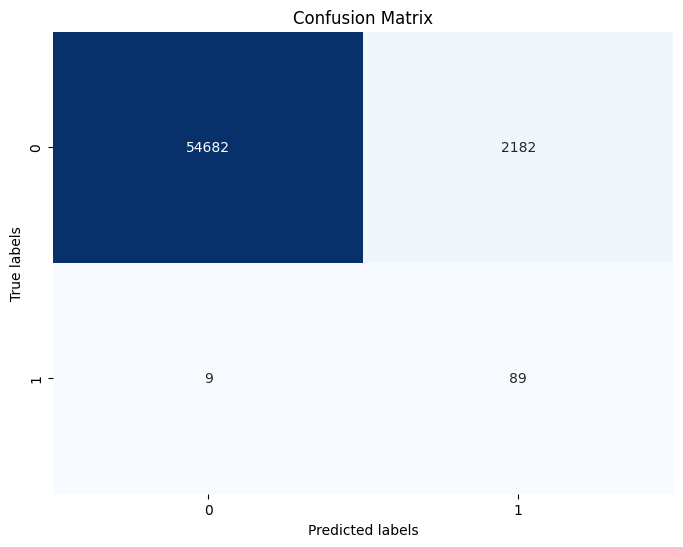

In [39]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

4 Model: BalancedRandomForestClassifier

In [43]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Balanced Random Forest classifier
brf_model = BalancedRandomForestClassifier(random_state=42, verbose=False)

# Train the model on the original (imbalanced) training data
brf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_brf = brf_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_brf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



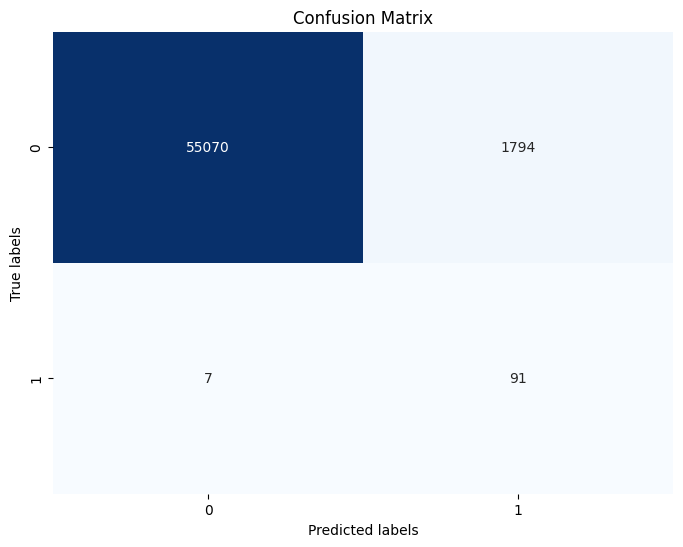

In [44]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_brf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

5 Model: BalancedRandomForestClassifier After SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

# Calculate the desired number of synthetic samples for the minority class
desired_minority_ratio = 0.2  # 20% of the total data (Previously, it was 5%. Results: 90% recall and 37% precision)
minority_class_count = y_train.value_counts()[1]  # Number of samples in the minority class
total_samples = len(y_train)  # Total number of samples in the training set
desired_minority_samples = int(total_samples * desired_minority_ratio)

# Calculate the sampling strategy for SMOTE
sampling_strategy = {1: desired_minority_samples}

# Instantiate SMOTE with the specified sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Generate synthetic samples and resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Balanced Random Forest classifier
brf_model = BalancedRandomForestClassifier(random_state=42)

# Train the model on the resampled data
brf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred_brf2 = brf_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_brf2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.89      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
X_train_resampled

,Time,V3,V4,V7,V10,V12,V14,V16,V17,V18,V19,V20,V21,V24,V27,V28,Amount
0,20.977500,-1.355130,-0.661630,-1.479661,-0.157403,0.510277,-0.066555,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.690980,0.077641,-0.032248,7.320000
1,10.576944,-3.058693,0.247945,-0.002192,0.284864,0.325560,0.721068,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.707090,0.002520,-0.069002,2.990000
2,11.441944,0.711976,-0.992425,-2.212603,-2.009561,1.820161,0.122746,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,-0.932803,0.038049,0.185340,175.100000
3,12.840000,-0.747565,-1.668119,-1.427984,1.756121,-0.722450,-0.195288,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,-0.538236,0.018045,-0.063005,6.100000
4,16.488611,0.115903,-3.454854,0.504347,-0.558955,-0.054708,0.134659,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-1.362383,-0.032580,-0.064194,86.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273015,19.122344,-4.461515,1.912618,-1.692294,-4.553383,-5.315218,-5.495810,-2.499738,-4.645826,-1.689894,-0.277288,0.169207,0.419936,-0.165727,0.727517,-0.234960,244.056197
273016,9.962894,-3.940424,5.621389,-5.777255,-6.071006,-8.275285,-8.410000,-7.863823,-14.566943,-5.192843,2.420473,1.110367,1.478460,0.000792,1.298540,0.551388,7.525839
273017,2.833109,-12.054666,7.235342,-11.567371,-12.017217,-15.862973,-11.207638,-13.063087,-19.443388,-7.692627,4.022064,0.530229,2.428847,0.063319,0.526992,0.312429,1.000000
273018,11.289054,-5.700220,5.030639,-7.826856,-7.601545,-7.359866,-7.752797,-8.231213,-13.159947,-5.156374,3.444913,0.343241,1.178134,-0.083665,0.359989,0.330806,12.885330


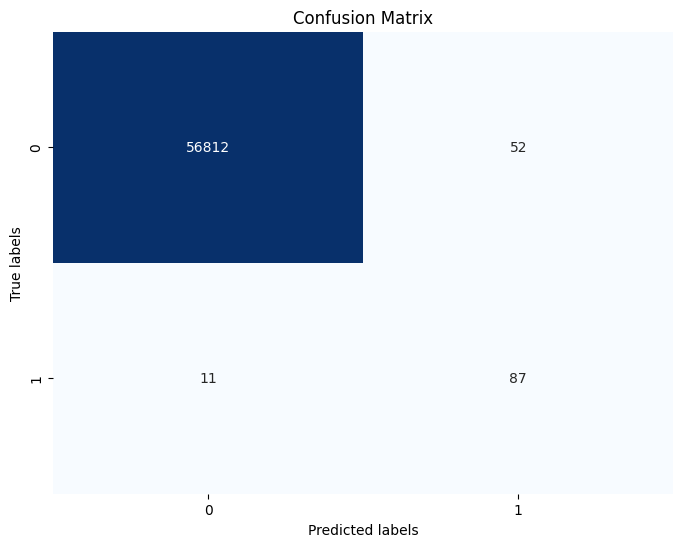

In [47]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_brf2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score
dataa={'Metrics':['Precision','Recall'],
      'Model 1':[precision_score(y_test,y_pred),
                 recall_score(y_test,y_pred)],
      'Model 2':[precision_score(y_test,y_pred_1),
                 recall_score(y_test,y_pred_1)],
      'Model 3':[precision_score(y_test,y_pred3),
                 recall_score(y_test,y_pred3)],
      'Model 4':[precision_score(y_test,y_pred_brf),
                 recall_score(y_test,y_pred_brf)],
      'Model 5':[precision_score(y_test,y_pred_brf2),
                 recall_score(y_test,y_pred_brf2)]}
table=pd.DataFrame(dataa)
table

,Metrics,Model 1,Model 2,Model 3,Model 4,Model 5
0,Precision,0.953488,0.864583,0.039190,0.048276,0.625899
1,Recall,0.836735,0.846939,0.908163,0.928571,0.887755


**Models:**

1.   Random Forest Classifier
2.   XGB classifier
3.   Random Forest Classifier after RandomUnderSampler
4.   Balanced Random Forest Classifier
5.   Balanced Random Forest Classifier After SMOTE


**Hyperparemeter tuning and modifications**

**1: Grid Search**

We implemented Grid Search to the Balanced Random Forest Classifier model.
Before the grid search, the model's performance was: Precision: 0.06; recall: 0.9. After the grid search, we got Precision: 0.42; recall: 0.9. So we kept the same recall raising the precision significative.

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Step 1: Hyperparameter Tuning
"""param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'sampling_strategy': ['auto', 0.5, 0.75, 1.0]
}
"""
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'sampling_strategy': ['auto', 0.5, 0.75]
}

brf_model22 = BalancedRandomForestClassifier(random_state=42)
grid_search22 = GridSearchCV(brf_model22, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search22.fit(X_train_resampled, y_train_resampled)

best_model22 = grid_search22.best_estimator_

# Make predictions on the testing data
y_pred_brf22 = best_model22.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_brf22))
print("Best hyperparameters:")
print(grid_search22.best_params_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.60      0.89      0.71        98

    accuracy                           1.00     56962
   macro avg       0.80      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'sampling_strategy': 'auto'}


2: Randomized Search Cross-Validation

We implemented another technique, search cross validation, this time to our 5th model Balanced Random Forest Classifier After SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint

# Calculate the desired number of synthetic samples for the minority class
desired_minority_ratio = 0.05  # 5% of the total data
minority_class_count = y_train.value_counts()[1]  # Number of samples in the minority class
total_samples = len(y_train)  # Total number of samples in the training set
desired_minority_samples = int(total_samples * desired_minority_ratio)

# Calculate the sampling strategy for SMOTE
sampling_strategy = {1: desired_minority_samples}

# Instantiate SMOTE with the specified sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Generate synthetic samples and resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'sampling_strategy': [0.5, 0.75, 1.0, 'auto']
}

# Initialize the Balanced Random Forest classifier
brf_model2 = BalancedRandomForestClassifier(random_state=42)

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=brf_model2, param_distributions=param_dist, n_iter=50, cv=5, scoring='recall', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the testing data
y_pred_brf = best_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_brf))


## NOTES

# To consider before applying normalization:

For a credit card fraud detection model, normalizing features might not be necessary or even appropriate in all cases, especially if the features are the result of a PCA process. Here are some considerations:

1. **PCA Transformation**: PCA (Principal Component Analysis) already transforms the original features into a set of linearly uncorrelated variables called principal components. These components typically have a mean of 0 and variance 1 after the transformation. Therefore, normalization may not be needed as part of the PCA process.

2. **Impact of Normalization**: Normalization (or standardization) of features to achieve a normal distribution (e.g., zero mean and unit variance) can be beneficial for certain algorithms like logistic regression or support vector machines. However, for other algorithms like decision trees, random forests, or neural networks, normalization might not have a significant impact on model performance.

3. **Feature Interpretation**: In the context of fraud detection, it's essential to consider the interpretability of features. Normalizing features could make it harder to interpret the importance of each feature in the context of fraud detection, especially if you're using techniques like PCA.

4. **Distribution of Features**: You mentioned that "Amount" seems to have an exponential distribution, and "Time" represents the time of day. In such cases, normalizing these features to achieve a normal distribution might not be appropriate. Instead, you could consider scaling the features to a specific range, such as [0, 1] or [-1, 1], depending on the requirements of your chosen algorithm.

5. **Model Performance**: Ultimately, the choice of whether to normalize features should be guided by its impact on model performance. Experiment with and without normalization and evaluate the performance of your fraud detection model using appropriate metrics, such as precision, recall, F1-score, or AUC-ROC.

In conclusion, while normalization can be beneficial in certain scenarios, it's not always necessary or appropriate, especially when dealing with features that have already been transformed using techniques like PCA. Consider the specific characteristics of your data and the requirements of your chosen algorithm when deciding whether to normalize features for your credit card fraud detection model.

## BIBLIOGRAPHY

- Mrozek, P., Panneerselvam, J., & Bagdasar, O. (2020). Efficient resampling for fraud detection during anonymised credit card transactions with unbalanced datasets. 2020 IEEE/ACM 13th International Conference on Utility and Cloud Computing (UCC). https://doi.org/10.1109/ucc48980.2020.00067
https://repository.derby.ac.uk/download/d5214f32c0752bf0b9555aae3b31d7924d45a040e299a46774a2b0f277e063af/534386/%282020%29%20UCC%20-%20Mrozek%20et%20al%20-%20Fraud%20detection.pdf

- https://medium.com/analytics-vidhya/credit-card-fraud-detection-how-to-handle-imbalanced-dataset-1f18b6f881
